In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gc

In [2]:
# change the font size of plot
plt.rcParams.update({'font.size': 16})

In [5]:
## Function to reduce the memory usage
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased from {:5.2f} Mb to {:5.2f} Mb ({:.1f}% reduction)'.format(start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [3]:
%%time
train = pd.read_csv('data/train.csv')
# test = pd.read_csv('data/test.csv')

Wall time: 11.3 s


In [4]:
train.memory_usage(), train.memory_usage().sum()

(Index                  128
 building_id      161728800
 meter            161728800
 timestamp        161728800
 meter_reading    161728800
 dtype: int64, 646915328)

In [6]:
train = reduce_mem_usage(train)

Mem. usage decreased from 616.95 Mb to 289.19 Mb (53.1% reduction)


In [7]:
# read data from file:
train_build_weather = pd.read_csv('C:/data/Kaggle_ASHRAE_energy/train_build_weather.csv')
# test_build_weather = pd.read_csv('C:/data/Kaggle_ASHRAE_energy/test_build_weather.csv')

In [8]:
train_build_weather = reduce_mem_usage(train_build_weather)

Mem. usage decreased from 1644.10 Mb to 544.00 Mb (66.9% reduction)


In [9]:
train.shape, train_build_weather.shape

((20216100, 4), (12676166, 17))

In [13]:
train.head(5)

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [14]:
train_build_weather.head(5)

,site_id,building_id,primary_use,square_feet,timestamp,airtemp,sealev,dewtemp,windsp,North,West,South,nowind,dewair,month,weekday,hour
0,0,0,Education,0.008171,2016-01-01 00:00:00,0.698242,0.628906,0.891602,0.000000,0.0,0.0,0.0,1.0,0.091248,1.0,4.0,0.0
1,0,0,Education,0.008171,2016-01-01 01:00:00,0.690430,0.634766,0.909180,0.061981,1.0,0.0,0.0,0.0,0.061951,1.0,4.0,1.0
2,0,0,Education,0.008171,2016-01-01 02:00:00,0.669922,0.634766,0.909180,0.000000,0.0,0.0,0.0,1.0,0.034424,1.0,4.0,2.0
3,0,0,Education,0.008171,2016-01-01 03:00:00,0.647461,0.633789,0.901367,0.000000,0.0,0.0,0.0,1.0,0.013771,1.0,4.0,3.0
4,0,0,Education,0.008171,2016-01-01 04:00:00,0.633301,0.632324,0.891602,0.107422,0.0,1.0,0.0,0.0,0.005165,1.0,4.0,4.0


In [19]:
gc.collect()

3254

In [24]:
merge_all_meters = pd.merge(left = train_build_weather, right = train,
                   left_on=['building_id','timestamp'], right_on=['building_id','timestamp'])

In [26]:
merge_all_meters.memory_usage().sum()

1167285090

In [27]:
merge_all_meters.head()

,site_id,building_id,primary_use,square_feet,timestamp,airtemp,sealev,dewtemp,windsp,North,West,South,nowind,dewair,month,weekday,hour,meter,meter_reading
0,0,0,Education,0.008171,2016-01-01 00:00:00,0.698242,0.628906,0.891602,0.000000,0.0,0.0,0.0,1.0,0.091248,1.0,4.0,0.0,0,0.0
1,0,0,Education,0.008171,2016-01-01 01:00:00,0.690430,0.634766,0.909180,0.061981,1.0,0.0,0.0,0.0,0.061951,1.0,4.0,1.0,0,0.0
2,0,0,Education,0.008171,2016-01-01 02:00:00,0.669922,0.634766,0.909180,0.000000,0.0,0.0,0.0,1.0,0.034424,1.0,4.0,2.0,0,0.0
3,0,0,Education,0.008171,2016-01-01 03:00:00,0.647461,0.633789,0.901367,0.000000,0.0,0.0,0.0,1.0,0.013771,1.0,4.0,3.0,0,0.0
4,0,0,Education,0.008171,2016-01-01 04:00:00,0.633301,0.632324,0.891602,0.107422,0.0,1.0,0.0,0.0,0.005165,1.0,4.0,4.0,0,0.0


In [38]:
merge_all_meters.timestamp = pd.to_datetime(merge_all_meters.timestamp)
merge_all_meters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20125605 entries, 0 to 20125604
Data columns (total 19 columns):
site_id          int8
building_id      int16
primary_use      object
square_feet      float16
timestamp        datetime64[ns]
airtemp          float16
sealev           float16
dewtemp          float16
windsp           float16
North            float16
West             float16
South            float16
nowind           float16
dewair           float16
month            float16
weekday          float16
hour             float16
meter            int8
meter_reading    float32
dtypes: datetime64[ns](1), float16(13), float32(1), int16(1), int8(2), object(1)
memory usage: 1.7+ GB


In [ ]:
# I am going to check if the meter reading is 0 for some buildings (especially commercial or edu) during weekend

In [92]:
merge_all_meters[['primary_use','building_id','weekday','meter','meter_reading']][merge_all_meters.building_id==313][merge_all_meters.primary_use=='Education'][merge_all_meters.weekday==2]

C:\Users\raymond.guo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,primary_use,building_id,weekday,meter,meter_reading
4350263,Education,313,2.0,0,107.379997
4350264,Education,313,2.0,0,104.809998
4350265,Education,313,2.0,0,107.110001
4350266,Education,313,2.0,0,105.529999
4350267,Education,313,2.0,0,102.669998
...,...,...,...,...,...
4358844,Education,313,2.0,0,34.250000
4358845,Education,313,2.0,0,35.919998
4358846,Education,313,2.0,0,38.080002
4358847,Education,313,2.0,0,23.379999


### look into the meter_reading

In [97]:
merge_all_meters.groupby(['site_id','meter']).meter_reading.mean()

site_id  meter
0        0          226.534698
         1         2295.519531
1        0          162.311234
         3           94.823799
2        0          152.617081
         1          307.098969
         3           39.410976
3        0          125.924767
4        0          181.091766
5        0           31.293583
6        0          176.274872
         1         2880.427490
         2          706.674988
7        0         2039.523193
         1          769.505676
         2          903.599854
         3         1344.659546
8        0           65.737808
9        0          180.021255
         1          474.851349
         2          150.437714
10       0           80.417557
         1           59.545654
         3         1743.104736
11       0          249.621338
         1           71.414688
         3          106.980446
12       0           99.062172
13       0          244.064789
         1          326.883728
         2        47100.535156
14       0          187.

above we can see the meter_reading of meter2 on site 13 is way higher than others

In [99]:
merge_all_meters[merge_all_meters.meter_reading==0].groupby(['site_id','meter']).meter_reading.value_counts()

site_id  meter  meter_reading
0        0      0.0              346426
         1      0.0               15649
1        0      0.0                   4
         3      0.0               39158
2        0      0.0                9943
         1      0.0               63832
         3      0.0              179006
3        0      0.0                3097
4        0      0.0                3879
5        0      0.0                7989
6        0      0.0                  42
         1      0.0               55965
         2      0.0               55533
7        0      0.0               12335
         1      0.0               37282
         2      0.0               31044
         3      0.0                7523
8        0      0.0               26582
9        0      0.0               44657
         1      0.0               34364
         2      0.0              107955
10       0      0.0                 491
         1      0.0               49428
         3      0.0               36216
11       1

on site0-meter0, site2-meter3, site9-meter2, site13-meter1, site14-meter1, they have more than 100k zeros, I will need to look at them too

action plan:
    1. check site13-meter2 meter_reading
    2. check zeros of meter_reading for site0-meter0, site2-meter3, site9-meter2, site13-meter1, site14-meter1

##### check site13-meter2

In [130]:
merge_all_meters[(merge_all_meters.site_id==13)&(merge_all_meters.meter==2)]['primary_use'].nunique()

12

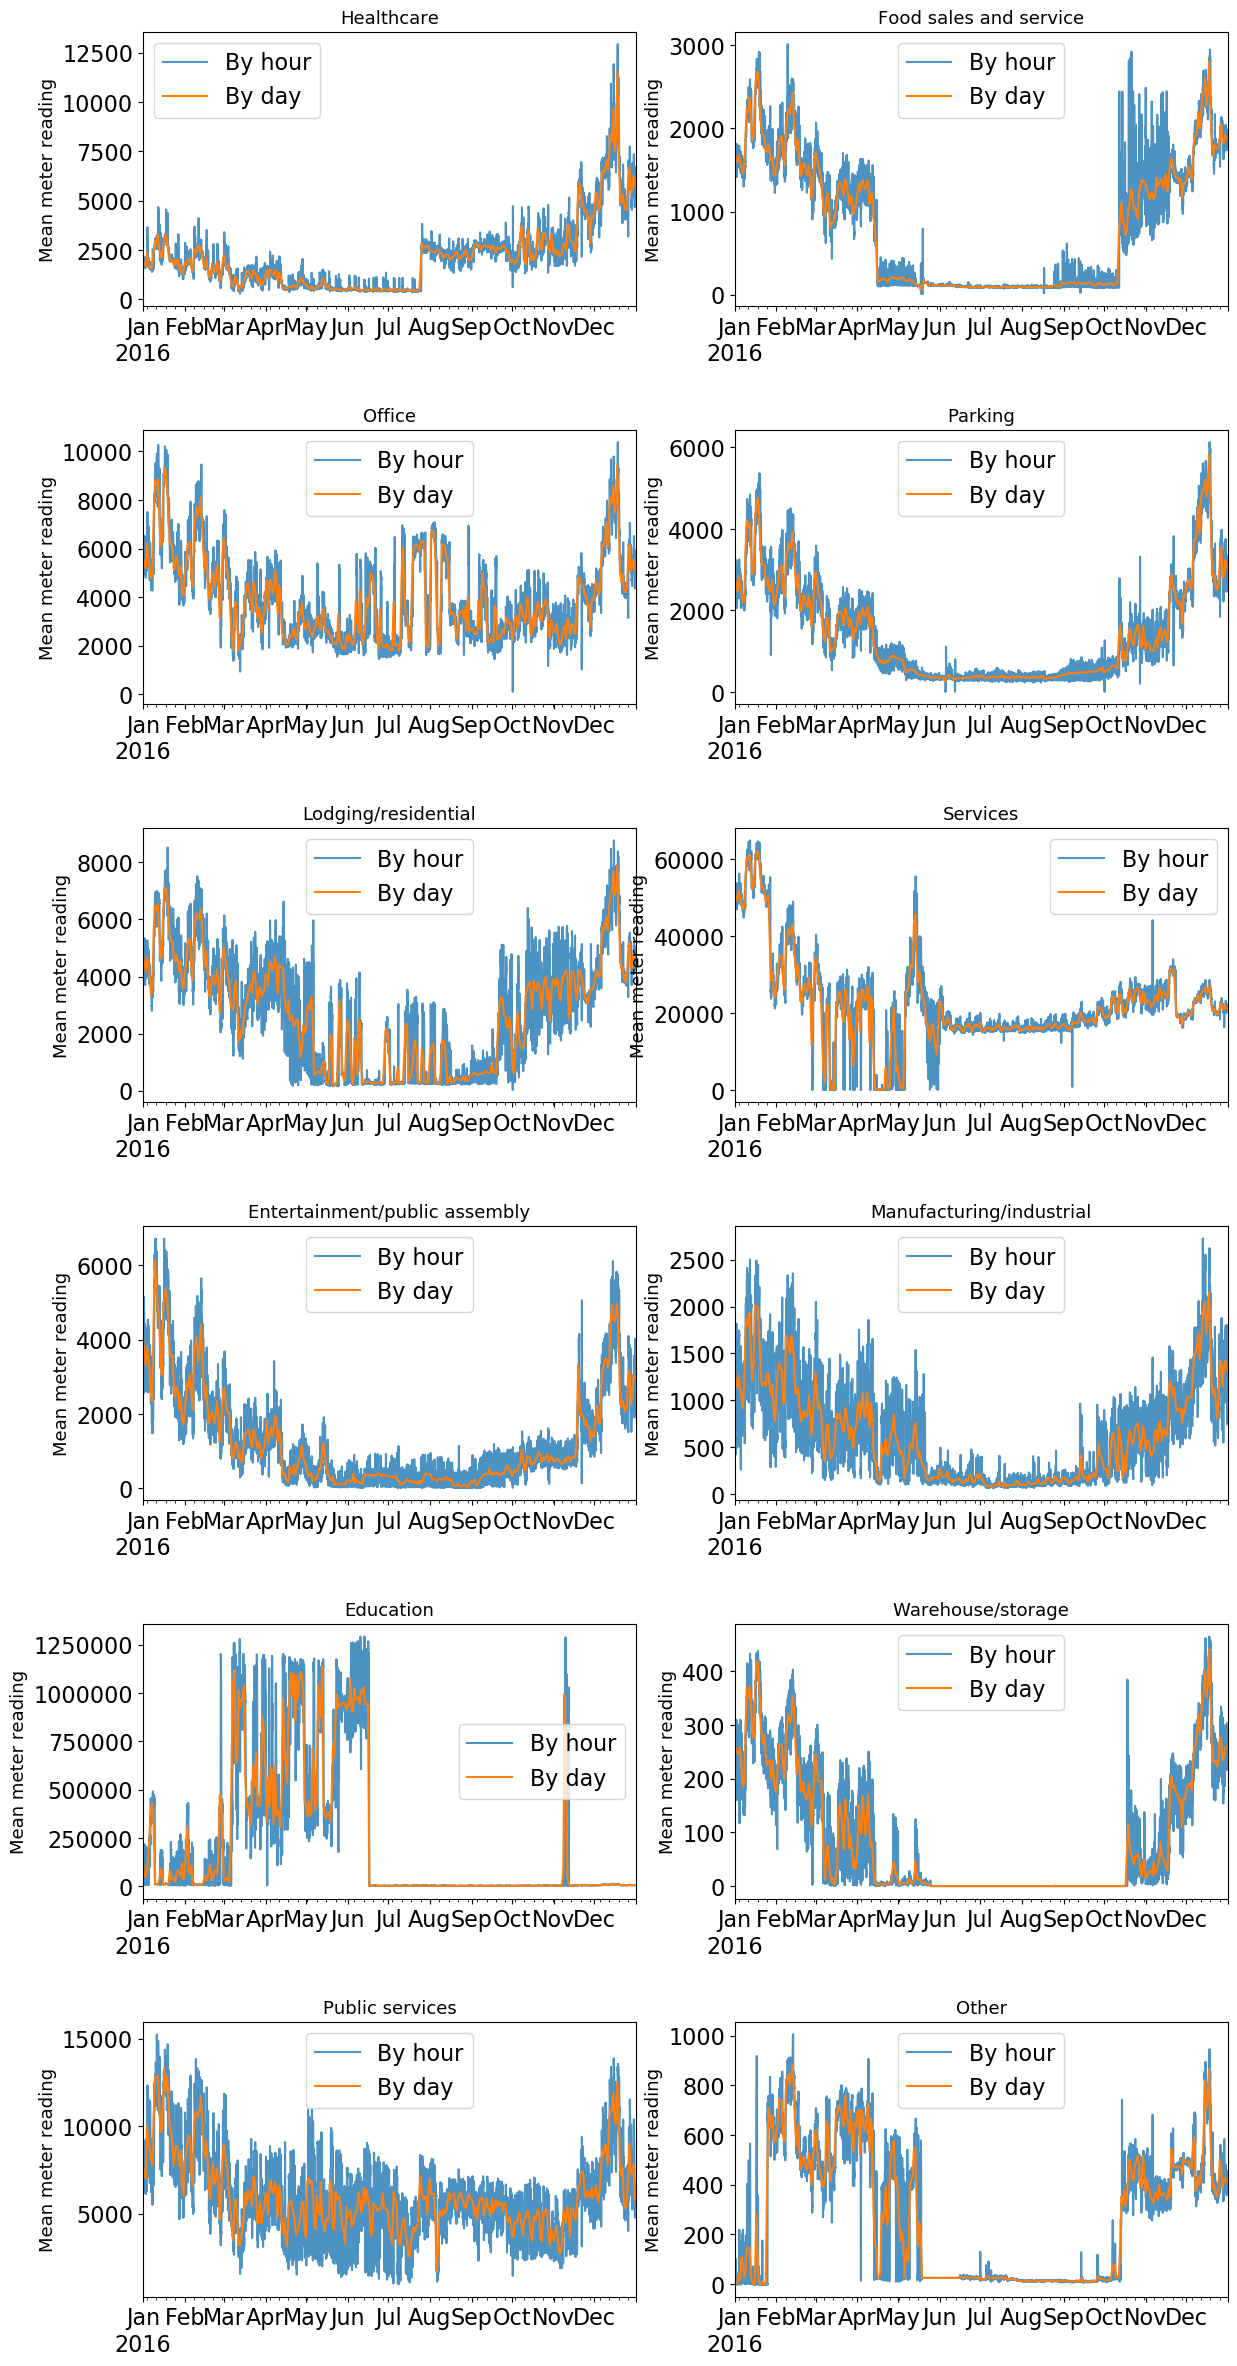

In [132]:
# break down by primary_use
fig, axes = plt.subplots(6, 2, figsize=(14, 30), dpi=100)
i = 0
for each in list(merge_all_meters[(merge_all_meters.site_id==13)&(merge_all_meters.meter==2)]['primary_use'].unique()):
    # for each type of buildings in site13, get the mean() of meter_reading of meter 2 by hour and day 
    merge_all_meters[(merge_all_meters.site_id==13)&(merge_all_meters.meter==2)&(merge_all_meters.primary_use==each)][['timestamp', 'meter_reading']].set_index('timestamp').resample('H').mean()['meter_reading'].plot(ax=axes[i%6][i//6], alpha=0.8, label='By hour', color='tab:blue').set_ylabel('Mean meter reading', fontsize=13);
    merge_all_meters[(merge_all_meters.site_id==13)&(merge_all_meters.meter==2)&(merge_all_meters.primary_use==each)][['timestamp', 'meter_reading']].set_index('timestamp').resample('D').mean()['meter_reading'].plot(ax=axes[i%6][i//6], alpha=1, label='By day', color='tab:orange').set_xlabel('');
    axes[i%6][i//6].legend();
    axes[i%6][i//6].set_title(each, fontsize=13);
    plt.subplots_adjust(hspace=0.45)
    i+=1

the meter_reading for Education is way larger than others, zoom in Education category:

In [139]:
merge_all_meters[(merge_all_meters.site_id==13) & (merge_all_meters.meter==2) & (merge_all_meters.primary_use == 'Education')]['building_id'].nunique()

17

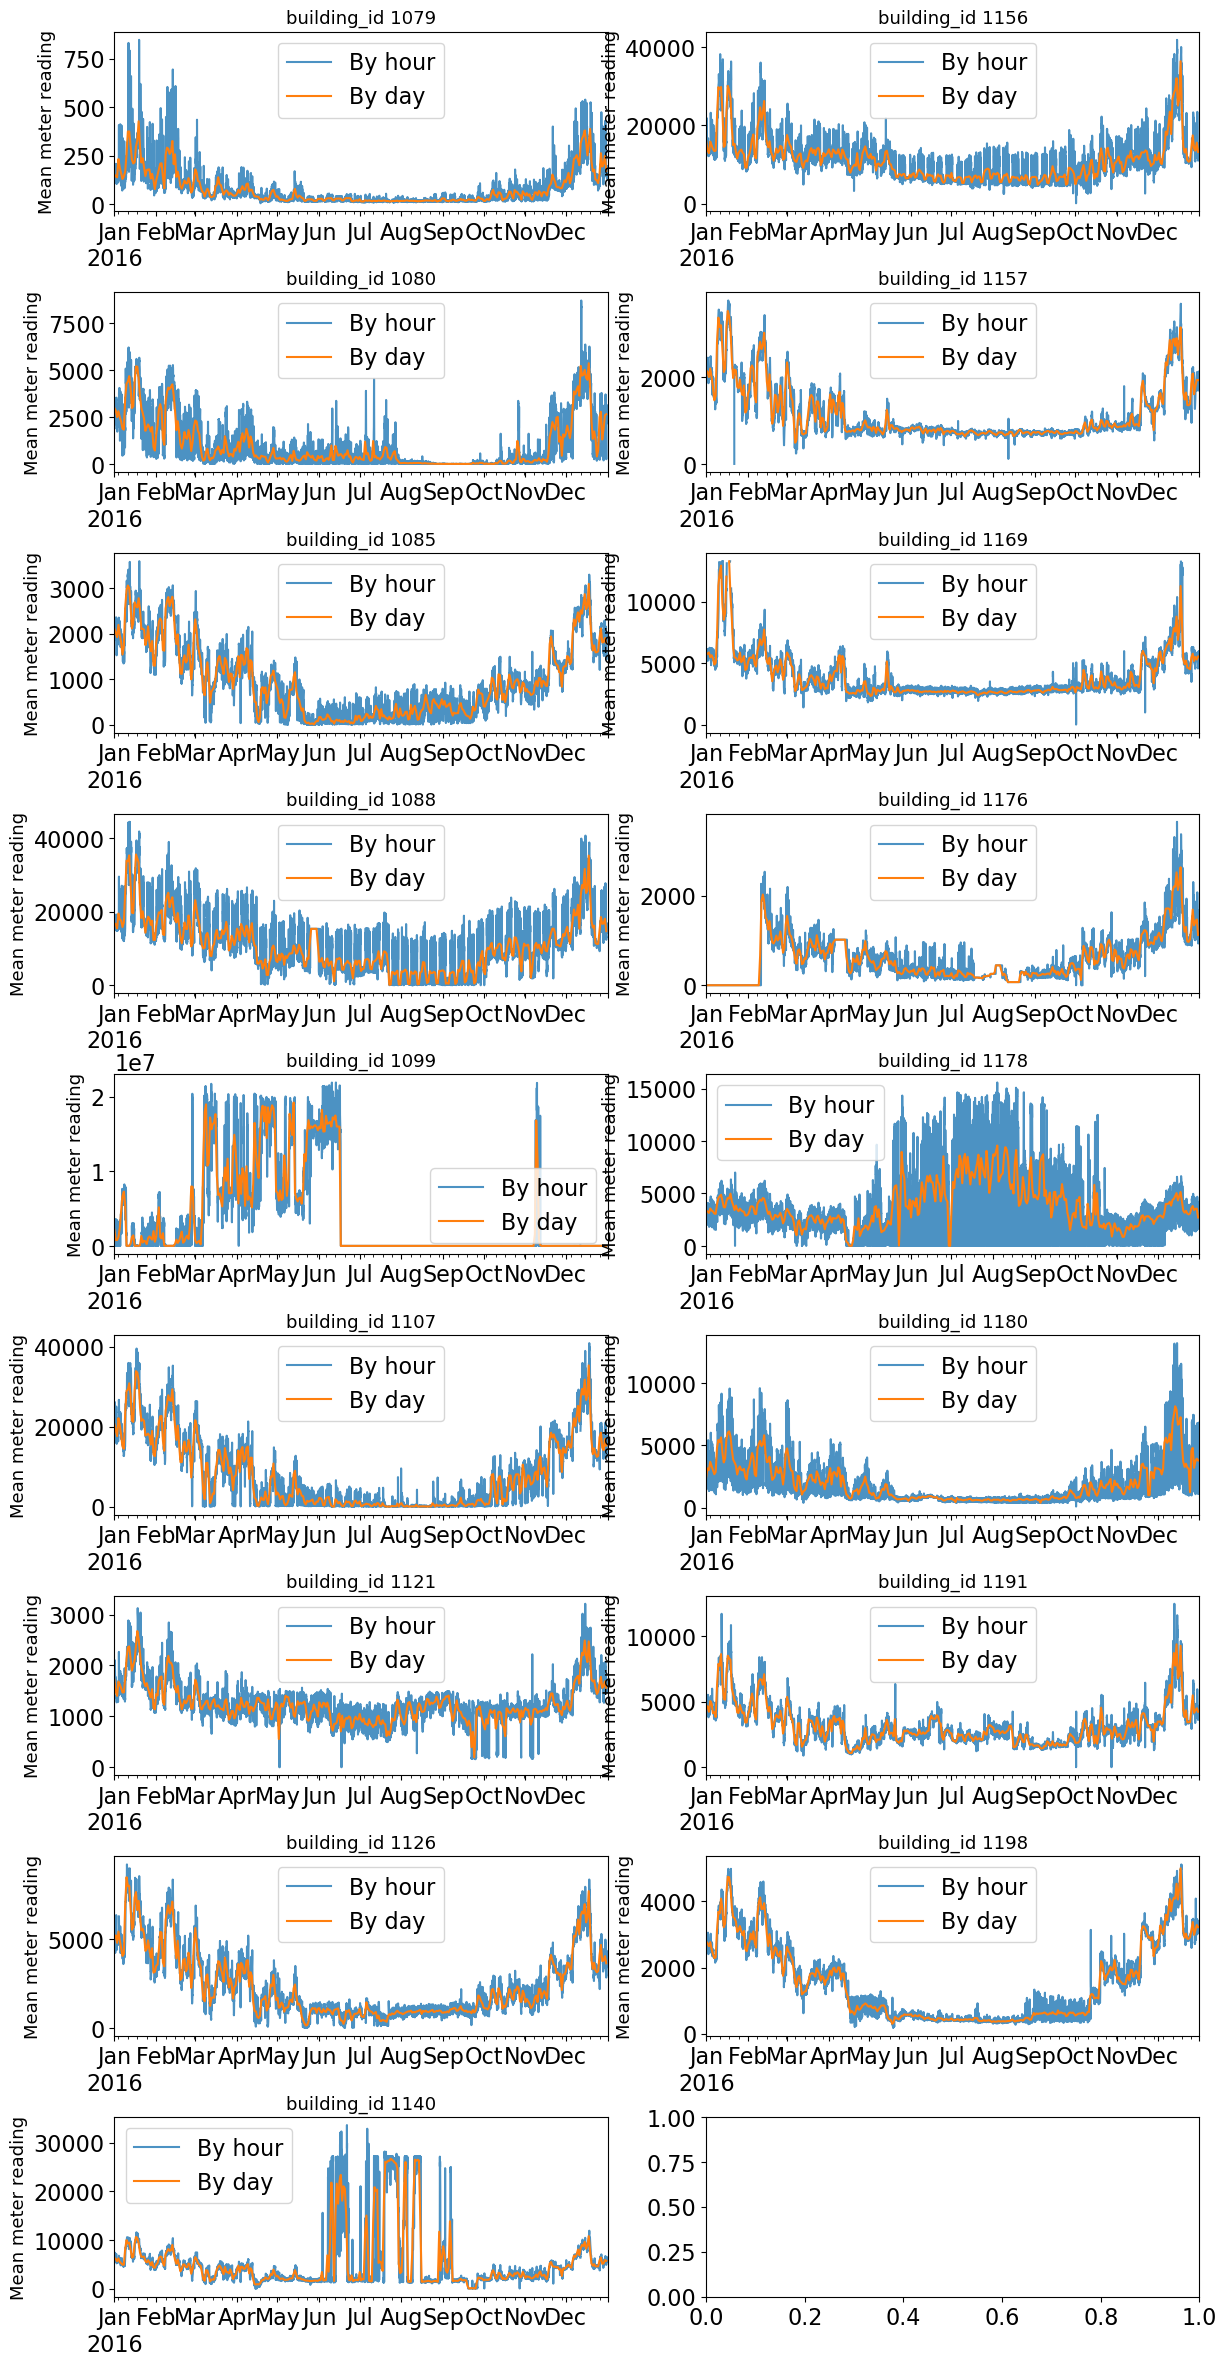

In [137]:
fig, axes = plt.subplots(9,2,figsize=(14, 30), dpi=100)
i = 0
for each in list(merge_all_meters[(merge_all_meters.site_id==13)&(merge_all_meters.meter==2)&(merge_all_meters.primary_use == 'Education')]['building_id'].unique()):
    merge_all_meters[(merge_all_meters.site_id==13)&(merge_all_meters.meter==2)&(merge_all_meters.primary_use == 'Education')&(merge_all_meters.building_id==each)][['timestamp', 'meter_reading']].set_index('timestamp').resample('H').mean()['meter_reading'].plot(ax=axes[i%9][i//9], alpha=0.8, label='By hour', color='tab:blue').set_ylabel('Mean meter reading', fontsize=13);
    merge_all_meters[(merge_all_meters.site_id==13)&(merge_all_meters.meter==2)&(merge_all_meters.primary_use == 'Education')&(merge_all_meters.building_id==each)][['timestamp', 'meter_reading']].set_index('timestamp').resample('D').mean()['meter_reading'].plot(ax=axes[i%9][i//9], alpha=1, label='By day', color='tab:orange').set_xlabel('');
    axes[i%9][i//9].legend();
    axes[i%9][i//9].set_title('building_id {}'.format(each), fontsize=13);
    plt.subplots_adjust(hspace=0.45)
    i+=1

so building_id = 1099 meter2 values are large, but they don't look like outliners.I will just keep those values for now.

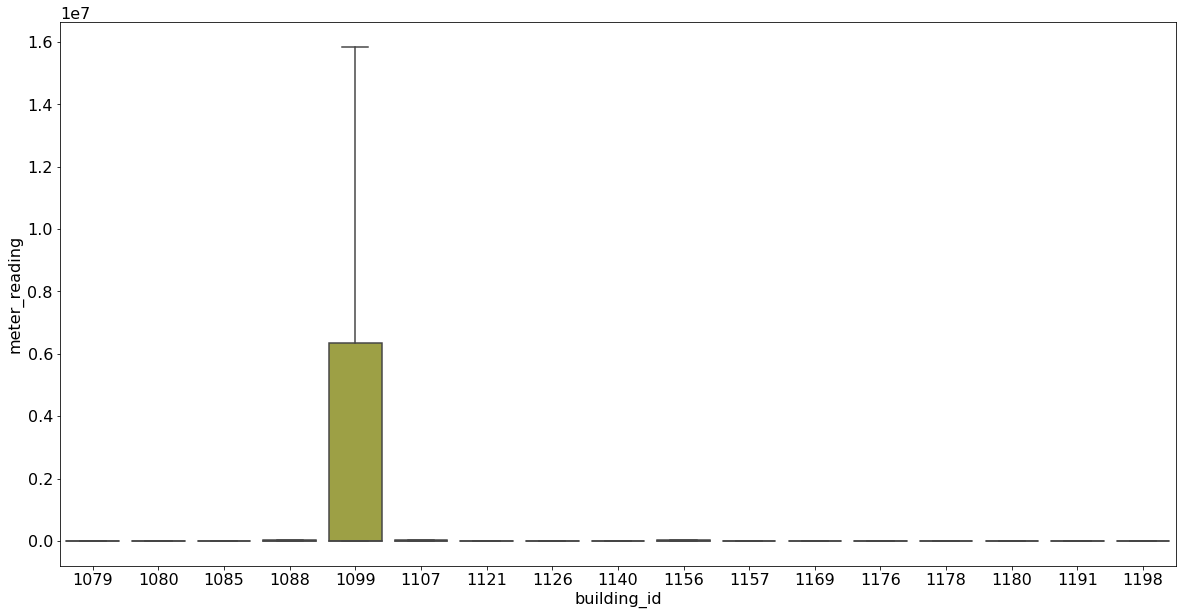

In [138]:
# check outliners for these building to compare:
fig, axes = plt.subplots(1, 1, figsize=(20, 10))
sns.boxplot(x = 'building_id', y = 'meter_reading', data = merge_all_meters[(merge_all_meters.site_id==13)&(merge_all_meters.meter==2)&(merge_all_meters.primary_use == 'Education')], showfliers=False)

In [69]:
merge_all_meters['timestamp'].dt.floor('d').value_counts().sort_index()

2016-01-01    51873
2016-01-02    53263
2016-01-03    53245
2016-01-04    52288
2016-01-05    52043
              ...  
2016-12-27    56632
2016-12-28    56473
2016-12-29    56634
2016-12-30    56685
2016-12-31    56655
Name: timestamp, Length: 366, dtype: int64

In [140]:
'''fig, axes = plt.subplots(8,2,figsize=(14, 30), dpi=100)
for i in range(merge_all_meters['site_id'].nunique()):
    merge_all_meters[merge_all_meters['site_id'] == i][['timestamp', 'meter_reading']].set_index('timestamp').resample('H').mean()['meter_reading'].plot(ax=axes[i%8][i//8], alpha=0.8, label='By hour', color='tab:blue').set_ylabel('Mean meter reading', fontsize=13);
    merge_all_meters[merge_all_meters['site_id'] == i][['timestamp', 'meter_reading']].set_index('timestamp').resample('D').mean()['meter_reading'].plot(ax=axes[i%8][i//8], alpha=1, label='By day', color='tab:orange').set_xlabel('');
    axes[i%8][i//8].legend();
    axes[i%8][i//8].set_title('site_id {}'.format(i), fontsize=13);
    plt.subplots_adjust(hspace=0.45)'''

"fig, axes = plt.subplots(8,2,figsize=(14, 30), dpi=100)\nfor i in range(merge_all_meters['site_id'].nunique()):\n    merge_all_meters[merge_all_meters['site_id'] == i][['timestamp', 'meter_reading']].set_index('timestamp').resample('H').mean()['meter_reading'].plot(ax=axes[i%8][i//8], alpha=0.8, label='By hour', color='tab:blue').set_ylabel('Mean meter reading', fontsize=13);\n    merge_all_meters[merge_all_meters['site_id'] == i][['timestamp', 'meter_reading']].set_index('timestamp').resample('D').mean()['meter_reading'].plot(ax=axes[i%8][i//8], alpha=1, label='By day', color='tab:orange').set_xlabel('');\n    axes[i%8][i//8].legend();\n    axes[i%8][i//8].set_title('site_id {}'.format(i), fontsize=13);\n    plt.subplots_adjust(hspace=0.45)"

##### check zeros for site0-meter0, site2-meter3, site9-meter2, site13-meter1, site14-meter1

In [192]:
site0_meter0 = (merge_all_meters[(merge_all_meters.site_id==0)&(merge_all_meters.meter==0)]['meter_reading']==0).astype(int)
site0_meter0 = pd.concat([site0_meter0,merge_all_meters[(merge_all_meters.site_id==0)&(merge_all_meters.meter==0)].timestamp], axis=1)
site0_meter0

,meter_reading,timestamp
0,1,2016-01-01 00:00:00
1,1,2016-01-01 01:00:00
2,1,2016-01-01 02:00:00
3,1,2016-01-01 03:00:00
4,1,2016-01-01 04:00:00
...,...,...
1076657,0,2016-12-31 19:00:00
1076658,0,2016-12-31 20:00:00
1076659,0,2016-12-31 21:00:00
1076660,0,2016-12-31 22:00:00


In [214]:
site2_meter3 = (merge_all_meters[(merge_all_meters.site_id==2)&(merge_all_meters.meter==3)]['meter_reading']==0).astype(int)
site2_meter3 = pd.concat([site2_meter3,merge_all_meters[(merge_all_meters.site_id==2)&(merge_all_meters.meter==3)].timestamp], axis=1)

site9_meter2 = (merge_all_meters[(merge_all_meters.site_id==9)&(merge_all_meters.meter==2)]['meter_reading']==0).astype(int)
site9_meter2 = pd.concat([site9_meter2,merge_all_meters[(merge_all_meters.site_id==9)&(merge_all_meters.meter==2)].timestamp], axis=1)

site13_meter1 = (merge_all_meters[(merge_all_meters.site_id==13)&(merge_all_meters.meter==1)]['meter_reading']==0).astype(int)
site13_meter1 = pd.concat([site13_meter1,merge_all_meters[(merge_all_meters.site_id==13)&(merge_all_meters.meter==1)].timestamp], axis=1)

site14_meter1 = (merge_all_meters[(merge_all_meters.site_id==14)&(merge_all_meters.meter==1)]['meter_reading']==0).astype(int)
site14_meter1 = pd.concat([site14_meter1,merge_all_meters[(merge_all_meters.site_id==14)&(merge_all_meters.meter==1)].timestamp], axis=1)

In [215]:
site2_meter3

,meter_reading,timestamp
1707552,0,2016-01-01 00:00:00
1707555,0,2016-01-01 01:00:00
1707558,0,2016-01-01 02:00:00
1707561,0,2016-01-01 03:00:00
1707564,0,2016-01-01 04:00:00
...,...,...
4123580,1,2016-12-31 19:00:00
4123583,1,2016-12-31 20:00:00
4123586,1,2016-12-31 21:00:00
4123589,1,2016-12-31 22:00:00


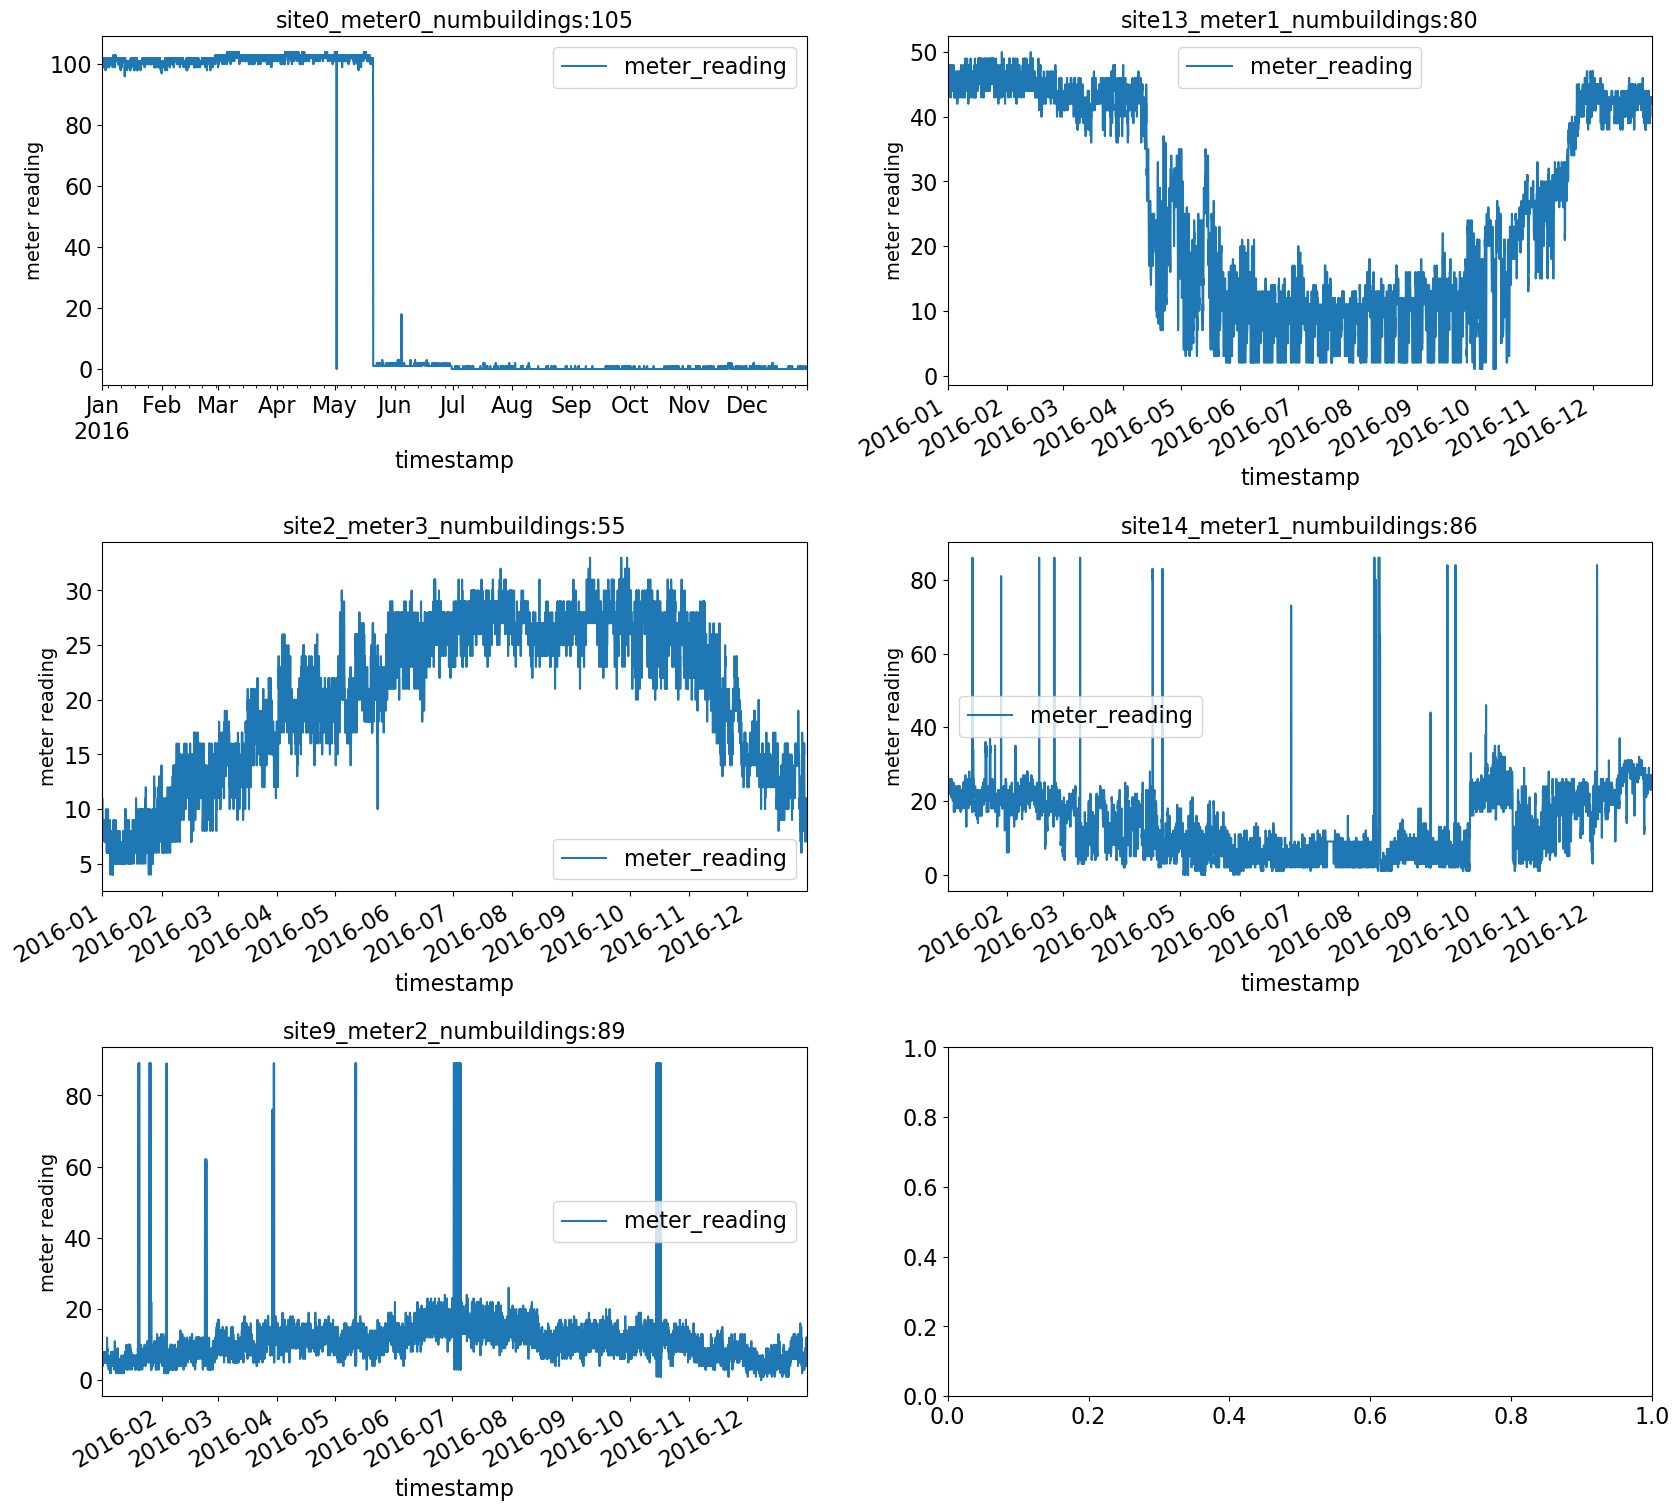

In [231]:
fig, axes = plt.subplots(3 ,2, figsize = (20,20), dpi=100)
site0_meter0.groupby('timestamp').sum()['meter_reading'].plot(ax = axes[0][0], alpha=1).set_ylabel('meter reading', fontsize = 14);
axes[0][0].set_title('site0_meter0_numbuildings:{}'.format(merge_all_meters[(merge_all_meters.site_id==0)&(merge_all_meters.meter==0)].building_id.nunique()), fontsize=16);
axes[0][0].legend();
plt.subplots_adjust(hspace=0.45)
site2_meter3.groupby('timestamp').sum()['meter_reading'].plot(ax = axes[1][0], alpha=1).set_ylabel('meter reading', fontsize = 14);
axes[1][0].set_title('site2_meter3_numbuildings:{}'.format(merge_all_meters[(merge_all_meters.site_id==2)&(merge_all_meters.meter==3)].building_id.nunique()), fontsize=16);
axes[1][0].legend();
plt.subplots_adjust(hspace=0.45)
site9_meter2.groupby('timestamp').sum()['meter_reading'].plot(ax = axes[2][0], alpha=1).set_ylabel('meter reading', fontsize = 14);
axes[2][0].set_title('site9_meter2_numbuildings:{}'.format(merge_all_meters[(merge_all_meters.site_id==9)&(merge_all_meters.meter==2)].building_id.nunique()), fontsize=16);
axes[2][0].legend();
plt.subplots_adjust(hspace=0.45)
site13_meter1.groupby('timestamp').sum()['meter_reading'].plot(ax = axes[0][1], alpha=1).set_ylabel('meter reading', fontsize = 14);
axes[0][1].set_title('site13_meter1_numbuildings:{}'.format(merge_all_meters[(merge_all_meters.site_id==13)&(merge_all_meters.meter==1)].building_id.nunique()), fontsize=16);
axes[0][1].legend();
plt.subplots_adjust(hspace=0.45)
site14_meter1.groupby('timestamp').sum()['meter_reading'].plot(ax = axes[1][1], alpha=1).set_ylabel('meter reading', fontsize = 14);
axes[1][1].set_title('site14_meter1_numbuildings:{}'.format(merge_all_meters[(merge_all_meters.site_id==14)&(merge_all_meters.meter==1)].building_id.nunique()), fontsize=16);
axes[1][1].legend();

this tells me maybe just there were something wrong with site0_meter0 from Jan to May. Others should be fine. I will delete those zeros for site0-meter0 from jan to May

### Start cleaning the Y (meter reading) data.

split into 4 dataset by different meters

In [225]:
train_set0 = merge_all_meters[merge_all_meters.meter==0].drop('meter',axis=1).reset_index(drop=True)
train_set1 = merge_all_meters[merge_all_meters.meter==1].drop('meter',axis=1).reset_index(drop=True)
train_set2 = merge_all_meters[merge_all_meters.meter==2].drop('meter',axis=1).reset_index(drop=True)
train_set3 = merge_all_meters[merge_all_meters.meter==3].drop('meter',axis=1).reset_index(drop=True)

In [239]:
train_set0.shape, train_set1.shape, train_set2.shape, train_set3.shape

((12017408, 18), (4160093, 18), (2686678, 18), (1261426, 18))

In [236]:
train_set0.head()

,site_id,building_id,primary_use,square_feet,timestamp,airtemp,sealev,dewtemp,windsp,North,West,South,nowind,dewair,month,weekday,hour,meter_reading
0,0,0,Education,0.008171,2016-01-01 00:00:00,0.698242,0.628906,0.891602,0.000000,0.0,0.0,0.0,1.0,0.091248,1.0,4.0,0.0,0.0
1,0,0,Education,0.008171,2016-01-01 01:00:00,0.690430,0.634766,0.909180,0.061981,1.0,0.0,0.0,0.0,0.061951,1.0,4.0,1.0,0.0
2,0,0,Education,0.008171,2016-01-01 02:00:00,0.669922,0.634766,0.909180,0.000000,0.0,0.0,0.0,1.0,0.034424,1.0,4.0,2.0,0.0
3,0,0,Education,0.008171,2016-01-01 03:00:00,0.647461,0.633789,0.901367,0.000000,0.0,0.0,0.0,1.0,0.013771,1.0,4.0,3.0,0.0
4,0,0,Education,0.008171,2016-01-01 04:00:00,0.633301,0.632324,0.891602,0.107422,0.0,1.0,0.0,0.0,0.005165,1.0,4.0,4.0,0.0


In [240]:
boolean_nonzeros = np.ones((train_set0.shape[0],1), dtype=bool)

for each in train_set0[train_set0.site_id==0].building_id.unique():
    build_data = train_set0[train_set0.building_id==each]
    build_start = build_data.head(1).index[0]
    index_firstnon0 = build_start
    cumsum_non0_rowcount = np.cumsum(build_data.meter_reading != 0)
    counts = 1

        # not only just check first non-0, but also check the next two rows, 
        # if they are 0, keep looking for the next non-0 
    while True:
        if cumsum_non0_rowcount.tail(1).values[0] < counts:
            index_firstnon0 = build_data.tail(1).index[0]+1
            break
        index_firstnon0= build_data[(cumsum_non0_rowcount == counts)].head(1).index[0]
        if train_set0.meter_reading[(index_firstnon0+1)] > 0 and train_set0.meter_reading[(index_firstnon0+2)] > 0:
            break
        counts+=1
    boolean_nonzeros[build_start:index_firstnon0] = False

# filter rows with zero:
train_set0 = train_set0[boolean_nonzeros]

In [242]:
train_set0.head()

,site_id,building_id,primary_use,square_feet,timestamp,airtemp,sealev,dewtemp,windsp,North,West,South,nowind,dewair,month,weekday,hour,meter_reading
3378,0,0,Education,0.008171,2016-05-20 18:00:00,0.698242,0.606934,0.863770,0.425537,0.0,0.0,0.0,0.0,0.120483,5.0,4.0,18.0,232.753006
3379,0,0,Education,0.008171,2016-05-20 19:00:00,0.706055,0.597168,0.873535,0.235596,0.0,0.0,0.0,0.0,0.120483,5.0,4.0,19.0,277.802002
3380,0,0,Education,0.008171,2016-05-20 20:00:00,0.740723,0.595703,0.881836,0.148804,0.0,0.0,0.0,0.0,0.158325,5.0,4.0,20.0,238.895996
3381,0,0,Education,0.008171,2016-05-20 21:00:00,0.763184,0.589844,0.873535,0.210693,1.0,0.0,0.0,0.0,0.196167,5.0,4.0,21.0,240.944000
3382,0,0,Education,0.008171,2016-05-20 22:00:00,0.734375,0.584961,0.891602,0.235596,1.0,0.0,0.0,0.0,0.139404,5.0,4.0,22.0,252.546997


done with execptional zero meter_reading deletion for site0-meter0

In [243]:
# Multiply by 0.2931 to get to model inputs into kWh like the other sites, 
# and 3.4118 to get back to kBTU for scoring
converted_meter0 = train_set0[train_set0.site_id ==0].meter_reading.mul(0.2931)

In [244]:
converted_meter0

3378       68.219906
3379       81.423767
3380       70.020416
3381       70.620686
3382       74.021525
             ...    
908404    116.533923
908405    114.333330
908406    119.935057
908407    120.735214
908408     80.123279
Name: meter_reading, Length: 567268, dtype: float64

In [245]:
# put the change back to the column
train_set0.update(converted_meter0)
train_set0

C:\Users\raymond.guo\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:5804: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


,site_id,building_id,primary_use,square_feet,timestamp,airtemp,sealev,dewtemp,windsp,North,West,South,nowind,dewair,month,weekday,hour,meter_reading
3378,0,0,Education,0.008171,2016-05-20 18:00:00,0.698242,0.606934,0.863770,0.425537,0.0,0.0,0.0,0.0,0.120483,5.0,4.0,18.0,68.219906
3379,0,0,Education,0.008171,2016-05-20 19:00:00,0.706055,0.597168,0.873535,0.235596,0.0,0.0,0.0,0.0,0.120483,5.0,4.0,19.0,81.423767
3380,0,0,Education,0.008171,2016-05-20 20:00:00,0.740723,0.595703,0.881836,0.148804,0.0,0.0,0.0,0.0,0.158325,5.0,4.0,20.0,70.020416
3381,0,0,Education,0.008171,2016-05-20 21:00:00,0.763184,0.589844,0.873535,0.210693,1.0,0.0,0.0,0.0,0.196167,5.0,4.0,21.0,70.620686
3382,0,0,Education,0.008171,2016-05-20 22:00:00,0.734375,0.584961,0.891602,0.235596,1.0,0.0,0.0,0.0,0.139404,5.0,4.0,22.0,74.021525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12017403,15,1448,Office,0.105164,2016-12-31 19:00:00,0.413330,0.482178,0.437500,0.235596,0.0,0.0,1.0,0.0,0.194458,12.0,5.0,19.0,3.400000
12017404,15,1448,Office,0.105164,2016-12-31 20:00:00,0.410645,0.478516,0.423096,0.318115,0.0,0.0,1.0,0.0,0.206543,12.0,5.0,20.0,2.700000
12017405,15,1448,Office,0.105164,2016-12-31 21:00:00,0.410645,0.479736,0.450684,0.210693,0.0,0.0,1.0,0.0,0.177246,12.0,5.0,21.0,3.050000
12017406,15,1448,Office,0.105164,2016-12-31 22:00:00,0.402832,0.485840,0.458740,0.190063,0.0,0.0,1.0,0.0,0.158325,12.0,5.0,22.0,3.125000


In [247]:
## list memory taken of objects
import sys
# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']
# Get a sorted list of the objects and their sizes
sorted([(x, sys.getsizeof(globals().get(x)) / 1024**2) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)

Wall time: 0 ns


[('merge_all_meters', 2936.580729484558),
 ('train_build_weather', 2116.56392288208),
 ('train', 1600.2048988342285),
 ('train_set0', 1368.8216886520386),
 ('train_set1', 436.1241979598999),
 ('train_set2', 284.6838331222534),
 ('train_set3', 132.222562789917),
 ('site0_meter0', 57.3265495300293),
 ('converted_meter0', 28.655845642089844),
 ('site9_meter2', 14.822181701660156),
 ('site14_meter1', 14.160579681396484),
 ('site13_meter1', 13.399662017822266),
 ('boolean_nonzeros', 11.460800170898438),
 ('site2_meter3', 9.191535949707031),
 ('build_data', 0.9382553100585938),
 ('a', 0.2682647705078125),
 ('temp', 0.1120147705078125),
 ('cumsum_non0_rowcount', 0.10054779052734375),
 ('axes', 0.000152587890625),
 ('reduce_mem_usage', 0.00012969970703125),
 ('np', 7.62939453125e-05),
 ('pd', 7.62939453125e-05),
 ('plt', 7.62939453125e-05),
 ('sns', 7.62939453125e-05),
 ('fig', 5.340576171875e-05),
 ('build_start', 3.0517578125e-05),
 ('each', 3.0517578125e-05),
 ('index_firstnon0', 3.05175781

### save results

In [248]:
train_set0.to_csv('C:/data/Kaggle_ASHRAE_energy/train_set0.csv', index = False)
train_set1.to_csv('C:/data/Kaggle_ASHRAE_energy/train_set1.csv', index = False)
train_set2.to_csv('C:/data/Kaggle_ASHRAE_energy/train_set2.csv', index = False)
train_set3.to_csv('C:/data/Kaggle_ASHRAE_energy/train_set3.csv', index = False)

In [249]:
del train_set0
del train_set1
del train_set2
del train_set3
del merge_all_meters
del train_build_weather
del train
gc.collect()

73851

split the test set by meter

In [250]:
test_build_weather = pd.read_csv('C:/data/Kaggle_ASHRAE_energy/test_build_weather.csv')
test_build_weather.head()

,site_id,building_id,primary_use,square_feet,timestamp,airtemp,sealev,dewtemp,windsp,North,West,South,nowind,dewair,month,weekday,hour
0,0,0,Education,0.008173,2017-01-01 00:00:00,0.604922,0.649573,0.756888,0.148760,1.0,0.0,0.0,0.0,0.110155,1.0,6.0,0.0
1,0,0,Education,0.008173,2017-01-01 01:00:00,0.604922,0.656899,0.774716,0.128099,1.0,0.0,0.0,0.0,0.091222,1.0,6.0,1.0
2,0,0,Education,0.008173,2017-01-01 02:00:00,0.582902,0.655678,0.774716,0.128099,0.0,0.0,1.0,0.0,0.061962,1.0,6.0,2.0
3,0,0,Education,0.008173,2017-01-01 03:00:00,0.597150,0.659341,0.782820,0.128099,0.0,0.0,1.0,0.0,0.072289,1.0,6.0,3.0
4,0,0,Education,0.008173,2017-01-01 04:00:00,0.590674,0.660562,0.782820,0.107438,1.0,0.0,0.0,0.0,0.063683,1.0,6.0,4.0


In [251]:
test = pd.read_csv('data/test.csv')
test.head()

,row_id,building_id,meter,timestamp
0,0,0,0,2017-01-01 00:00:00
1,1,1,0,2017-01-01 00:00:00
2,2,2,0,2017-01-01 00:00:00
3,3,3,0,2017-01-01 00:00:00
4,4,4,0,2017-01-01 00:00:00


In [253]:
test_set0 = pd.merge(left= test_build_weather, right= test[test.meter==0].drop('meter', axis=1), 
                            left_on=['building_id','timestamp'], right_on=['building_id','timestamp'])
test_set1 = pd.merge(left= test_build_weather, right= test[test.meter==1].drop('meter', axis=1), 
                            left_on=['building_id','timestamp'], right_on=['building_id','timestamp'])
test_set2 = pd.merge(left= test_build_weather, right= test[test.meter==2].drop('meter', axis=1), 
                            left_on=['building_id','timestamp'], right_on=['building_id','timestamp'])
test_set3 = pd.merge(left= test_build_weather, right= test[test.meter==3].drop('meter', axis=1), 
                            left_on=['building_id','timestamp'], right_on=['building_id','timestamp'])

In [ ]:
test_set0.to_csv('C:/data/Kaggle_ASHRAE_energy/test_set0.csv', index = False)
test_set1.to_csv('C:/data/Kaggle_ASHRAE_energy/test_set1.csv', index = False)
test_set2.to_csv('C:/data/Kaggle_ASHRAE_energy/test_set2.csv', index = False)
test_set3.to_csv('C:/data/Kaggle_ASHRAE_energy/test_set3.csv', index = False)

In [ ]:
del test_set0
del test_set1
del test_set2
del test_set3
del test_build_weather
del test
gc.collect()